In [1]:
import random
import operator
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
class Address:
    def __init__(self, id_):
        self.id_ = id_
    
    def distance(self, address):
        return distanceMatrix[self.id_][address.id_]

    def __repr__(self):
        return str(self.id_)

In [101]:
class Crossroad:
    def __init__(self, id_, addressList):
        self.id_ = id_
        self.addressList = addressList
    
    def findBestRouteBetweenAddresses(self):
        popSize = len(self.addressList) * (len(self.addressList) - 1)
        return geneticAlgorithm(self.addressList, popSize=popSize, eliteSize=10, mutationRate=0.01, generations=50)
    
    def distance(self, crossroad):
        return distanceMatrix[self.id_][crossroad.id_]

    def __repr__(self):
        return "Crossroad " + str(self.id_)

In [97]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0.0
        self.fitness = 0.0
    
    def routeDistance(self):
        if(self.distance == 0):
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromAddress = self.route[i]
                toAddress = None
                if(i + 1 < len(self.route)):
                    toAddress = self.route[i + 1]
                else: 
                    toAddress = self.route[0]
                # print(str(fromAddress) + " " + str(toAddress) + " " + str(fromAddress.distance(toAddress)))
                pathDistance += fromAddress.distance(toAddress)
            self.distance = pathDistance
        return self.distance

    def routeFitness(self):
        if(self.fitness == 0):
            self.fitness = 1 / float(self.routeDistance())
        
        return self.fitness

In [98]:
def createRoute(addressList):
    route = random.sample(addressList, len(addressList))
    return route

def initialPopulation(populationSize, addressList):
    population = []
    for i in range(0, populationSize):
        population.append(createRoute(addressList))
    return population

def rankRoutes(population):
    fitnessResults = {}
    for i in range(0, len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key=operator.itemgetter(1), reverse=True)

def selection(populationRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(populationRanked), columns=["Index", "Fitness"])
    df["cumulative_sum"] = df.Fitness.cumsum()
    df["cumulative_perc"] = 100 * df.cumulative_sum / df.Fitness.sum()

    for i in range(0, eliteSize):
        selectionResults.append(populationRanked[i][0])
    for i in range(0, len(populationRanked) - eliteSize):
        pick = 100 * random.random()
        for i in range(0, len(populationRanked)):
            if(pick <= df.iat[i, 3]):
                selectionResults.append(populationRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent2))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0, eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool) - i - 1])
        children.append(child)
    return children

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            address1 = individual[swapped]
            address2 = individual[swapWith]

            individual[swapped] = address2
            individual[swapWith] = address1

    return individual

def mutatePopulation(population, mutationRate):
    mutatedPopulation = []

    for individual in range(0, len(population)):
        mutatedIndividual = mutate(population[individual], mutationRate)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    progress = []
    pop = initialPopulation(popSize, population)
    progress.append(1 / rankRoutes(pop)[0][1])
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])

    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    print(bestRoute)

    # plt.plot(progress)
    # plt.ylabel('Distance')
    # plt.xlabel('Generation')
    # plt.show()

Initial distance: 35.0
Final distance: 35.0
[2, 0, 1, 4, 3]


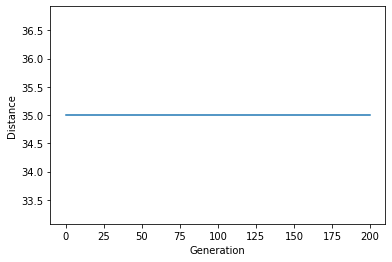

In [99]:
distanceMatrix = [[0,       2,      np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf],
                  [2,       0,      3,      np.inf, np.inf, np.inf, np.inf, np.inf, np.inf],
                  [np.inf,  3,      0,      3     , np.inf, np.inf, 1     ,      2,      1],
                  [np.inf,  np.inf, 3,      0     , 2     , 2     , np.inf, np.inf, np.inf],
                  [np.inf,  np.inf, np.inf, 2     , 0     , 2     , np.inf, np.inf, np.inf],
                  [np.inf,  np.inf, np.inf, 2     , 2     , 0     , np.inf, np.inf, np.inf],
                  [np.inf,  np.inf, 1     , np.inf, np.inf, np.inf, 0,      np.inf, np.inf],
                  [np.inf,  np.inf, 2     , np.inf, np.inf, np.inf, np.inf, 0,      np.inf],
                  [np.inf,  np.inf, 1     , np.inf, np.inf, np.inf, np.inf, np.inf, 0     ]]
                  
crossroadList = []


geneticAlgorithm(population=crossroadList, popSize=100, eliteSize=20, mutationRate=0.01, generations=200)

In [ ]:
dist_matrix = np.full((403, 403), np.inf)

with open('../data/graphs/skofja-loka.net', 'r', encoding="utf-8") as f:
    for line in f.readlines():
        if(line.strip().endswith("crossroad")):
            vals = line.strip().split(" ")
        elif(line.startswith("*edges")):
            break